<a href="https://colab.research.google.com/github/nzywalewskisju/Portfolio_Projects/blob/main/Baseball_Statistics_Projections/Baseball_Statistics_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# must ensure that obp.csv is loaded to the files of Google Colab before running this code
df = pd.read_csv('/content/obp.csv')
print("Shape:", df.shape)
df

Shape: (572, 15)


,Name,playerid,birth_date,PA_21,OBP_21,PA_20,OBP_20,PA_19,OBP_19,PA_18,OBP_18,PA_17,OBP_17,PA_16,OBP_16
0,Drew Butera,3411,8/9/1983,36,0.091,43.0,0.190,49.0,0.229,182.0,0.264,177.0,0.284,133.0,0.328
1,Skye Bolt,17723,1/15/1994,60,0.103,NaN,NaN,11.0,0.182,NaN,NaN,NaN,NaN,NaN,NaN
2,Curtis Terry,18881,10/6/1996,48,0.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scott Schebler,12225,10/6/1990,34,0.147,1.0,0.000,95.0,0.253,430.0,0.337,531.0,0.307,282.0,0.330
4,Albert Almora Jr.,14109,4/16/1994,54,0.148,34.0,0.265,363.0,0.271,479.0,0.323,323.0,0.338,117.0,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Yasmani Grandal,11368,11/8/1988,375,0.420,194.0,0.351,632.0,0.380,518.0,0.349,482.0,0.308,457.0,0.339
568,Chris Owings,10030,8/12/1991,50,0.420,44.0,0.318,196.0,0.209,309.0,0.272,386.0,0.299,466.0,0.315
569,Bryce Harper,11579,10/16/1992,599,0.429,244.0,0.420,682.0,0.372,695.0,0.393,492.0,0.413,627.0,0.373
570,Juan Soto,20123,10/25/1998,654,0.465,196.0,0.490,659.0,0.401,494.0,0.406,NaN,NaN,NaN,NaN


In [ ]:
## creating a new column called birth_year, which displays which year the player was born
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%m/%d/%Y')
df['birth_year'] = df['birth_date'].dt.year

## creating a new column called Age_21, which tells us the age of the player during the 2021 season
df['Age_21'] = 2021 - df['birth_year']    # this is accomplished by subtracting 2021 - birth_year

# dropping playerid, birth_date, and birth_year columns since they are no longer needed
df = df.drop(['playerid','birth_date','birth_year'], axis = 1)
df.head(4)

,Name,PA_21,OBP_21,PA_20,OBP_20,PA_19,OBP_19,PA_18,OBP_18,PA_17,OBP_17,PA_16,OBP_16,Age_21
0,Drew Butera,36,0.091,43.0,0.19,49.0,0.229,182.0,0.264,177.0,0.284,133.0,0.328,38
1,Skye Bolt,60,0.103,NaN,NaN,11.0,0.182,NaN,NaN,NaN,NaN,NaN,NaN,27
2,Curtis Terry,48,0.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
3,Scott Schebler,34,0.147,1.0,0.00,95.0,0.253,430.0,0.337,531.0,0.307,282.0,0.330,31


count    572.000000
mean       0.305063
std        0.049787
min        0.091000
25%        0.277000
50%        0.310000
75%        0.337000
max        0.466000
Name: OBP_21, dtype: float64


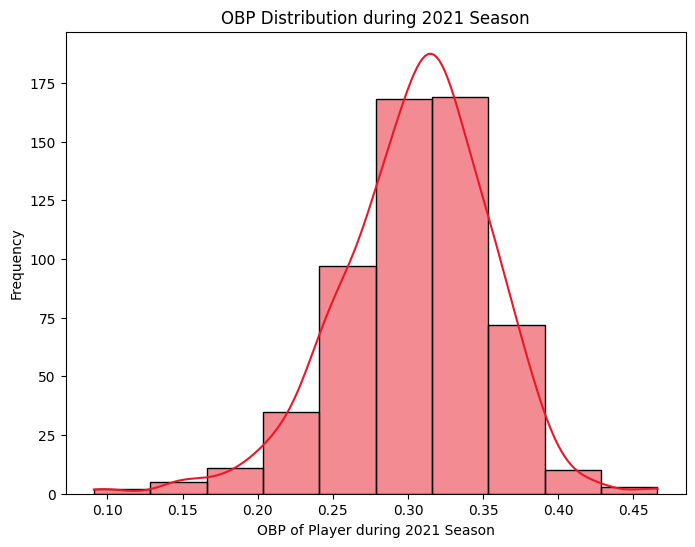

In [ ]:
# descriptive statistics for the OBPs during the 2021 season
print(df['OBP_21'].describe())

# visualizing the distribution of OBP during the 2021 season using a histogram
plt.figure(figsize=(8,6))
sns.histplot(df['OBP_21'], bins=10, kde=True, color='#E81828')
plt.title('OBP Distribution during 2021 Season')
plt.xlabel('OBP of Player during 2021 Season')
plt.ylabel('Frequency')
plt.show()

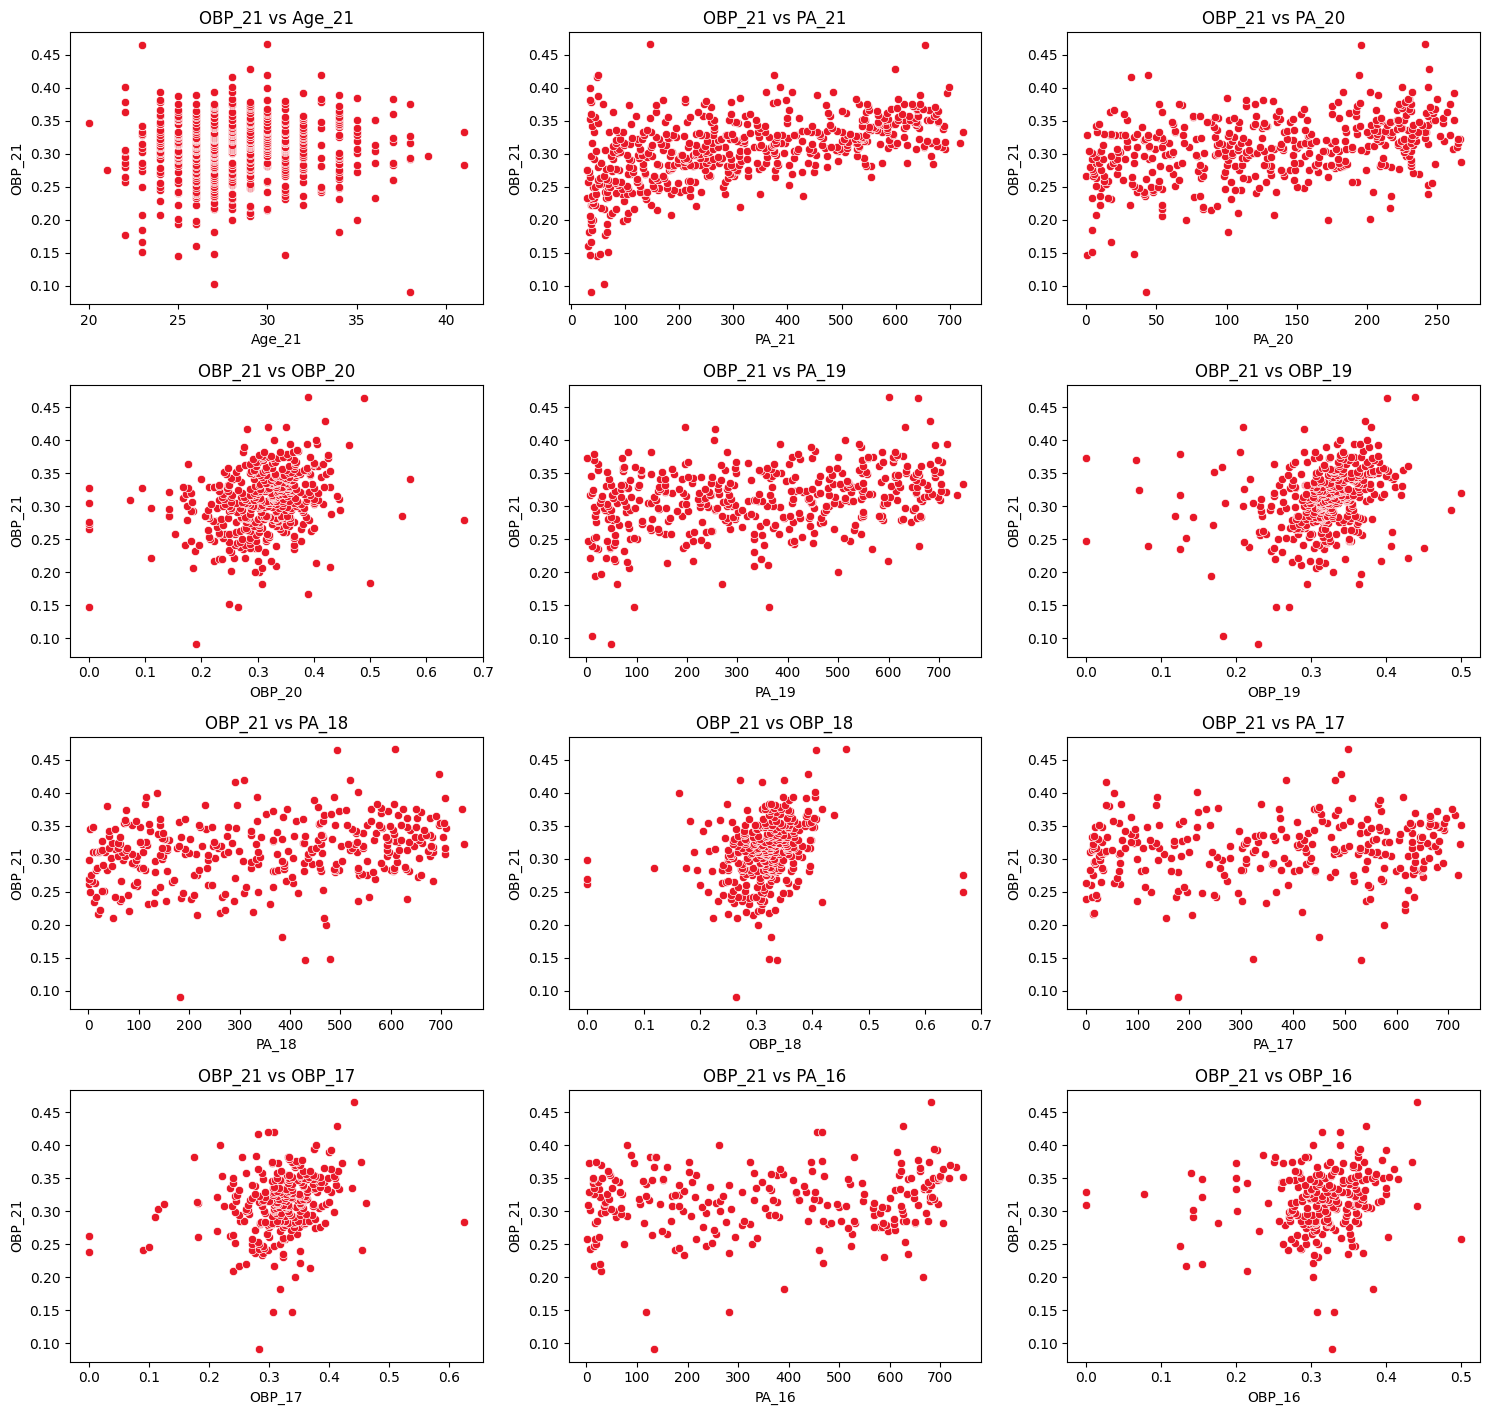

In [ ]:
# see the relationship between each variable and OBP_21
# list of variables to compare with OBP_21
x_variables = ['Age_21','PA_21','PA_20','OBP_20','PA_19','OBP_19','PA_18','OBP_18','PA_17','OBP_17','PA_16','OBP_16']
y_variable = 'OBP_21'

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# flattening the axes array for easy iteration
axes = axes.flatten()

# looping through x_variables and plot them against y_variable (OBP_21)
for i, var in enumerate(x_variables):     # help with this code was gotten from ChatGPT
    sns.scatterplot(x=df[var], y=df[y_variable], ax=axes[i], color='#E81828')
    axes[i].set_title(f'{y_variable} vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(y_variable)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
print("Missing Values of each variable:")
print(df.isnull().sum()) # total missing values in each var
print("Total Missing values in dataset:")
print(df.isnull().sum().sum()) # total missing values in dataset

Missing Values of each variable:
Name        0
PA_21       0
OBP_21      0
PA_20     106
OBP_20    106
PA_19     135
OBP_19    135
PA_18     213
OBP_18    213
PA_17     274
OBP_17    274
PA_16     325
OBP_16    325
Age_21      0
dtype: int64
Total Missing values in dataset:
2106


  Season  Missing_Stats
5     16            325
4     17            274
3     18            213
2     19            135
1     20            106
0     21              0


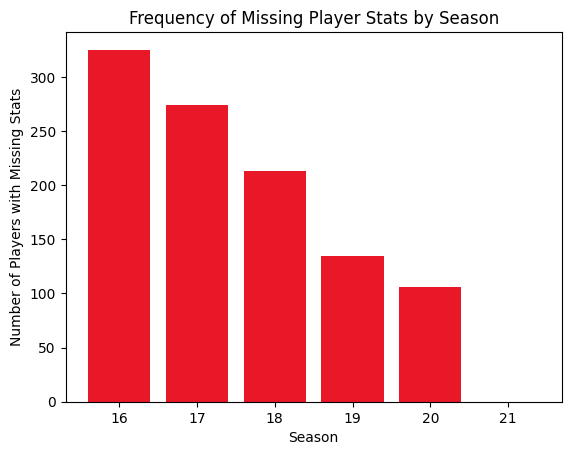

In [ ]:
# filtering out the 'PA_' columns that correspond to the player's plate appearances each year
PA_columns = [col for col in df.columns if 'PA_' in col] # this line of code was written with the help of ChatGPT

# counting missing values for 'PA_' columns (representing each season)
# this is because the number of missing values for PA_## is the same as the number of missing values for OBP_##
missing_stats = df[PA_columns].isnull().sum()

# creating a DataFrame showing the number of missing stats per season
missing_stats_by_season = pd.DataFrame({
    'Season': [col.split('_')[1] for col in missing_stats.index],     # this line of code was written with the help of ChatGPT
    'Missing_Stats': missing_stats.values
})

# sort in ascending order and display the missing stats by season
missing_stats_by_season = missing_stats_by_season.sort_values('Season')
print(missing_stats_by_season)

# visualizing using a bar chart
plt.bar(missing_stats_by_season['Season'], missing_stats_by_season['Missing_Stats'], color='#E81828')
plt.xlabel('Season')
plt.ylabel('Number of Players with Missing Stats')
plt.title('Frequency of Missing Player Stats by Season')
plt.show()

In [ ]:
# As we move further back in the dataset from 2021 to 2016, the increase in missing values can
# largely be attributed to players' career trajectories and the nature of player development in baseball.

# Younger players in their early careers may not have complete data from previous seasons due to limited
# playing time or performance, resulting in fewer statistics available for analysis.

# Additionally, injuries and time spent in the minor leagues can impact player participation,
# leading to incomplete records for those seasons.

# Since the 2021 data is used for prediction, it is expected that all players will have complete statistics for that year,
# but earlier seasons may reflect gaps as players establish themselves and contend with the uncertainties of their careers.

In [ ]:
## imputing values using k nearest neighbors (5)
imputer = KNNImputer(n_neighbors=5)
missing_vars = ['Age_21','PA_21','PA_20','OBP_20','PA_19','OBP_19','PA_18','OBP_18','PA_17','OBP_17','PA_16','OBP_16']
impute = pd.DataFrame(imputer.fit_transform(df[missing_vars]),columns = missing_vars)
df_imputed = pd.concat([df[['Name', 'OBP_21']], impute], axis=1)
print(df_imputed)
# referenced https://stackoverflow.com/questions/67525333/how-to-fill-missing-value-with-knn-in-python

                  Name  OBP_21  Age_21  PA_21  PA_20  OBP_20  PA_19  OBP_19  \
0          Drew Butera   0.091    38.0   36.0   43.0  0.1900   49.0  0.2290   
1            Skye Bolt   0.103    27.0   60.0   19.8  0.2452   11.0  0.1820   
2         Curtis Terry   0.146    25.0   48.0   35.8  0.2858  186.2  0.3058   
3       Scott Schebler   0.147    31.0   34.0    1.0  0.0000   95.0  0.2530   
4    Albert Almora Jr.   0.148    27.0   54.0   34.0  0.2650  363.0  0.2710   
..                 ...     ...     ...    ...    ...     ...    ...     ...   
567    Yasmani Grandal   0.420    33.0  375.0  194.0  0.3510  632.0  0.3800   
568       Chris Owings   0.420    30.0   50.0   44.0  0.3180  196.0  0.2090   
569       Bryce Harper   0.429    29.0  599.0  244.0  0.4200  682.0  0.3720   
570          Juan Soto   0.465    23.0  654.0  196.0  0.4900  659.0  0.4010   
571         Mike Trout   0.466    30.0  146.0  241.0  0.3900  600.0  0.4380   

     PA_18  OBP_18  PA_17  OBP_17  PA_16  OBP_16  


In [ ]:
# creating train/test split
x = df_imputed.drop(columns=['OBP_21'])
y = df_imputed['OBP_21']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

names_train = x_train['Name']
names_test = x_test['Name']
x_train = x_train.drop(columns=['Name'])
x_test = x_test.drop(columns=['Name'])

In [ ]:
# initalize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators= 100, max_depth= None, min_samples_split= 5,min_samples_leaf=2,max_features="sqrt", oob_score=True, random_state= 1234)
# referenced https://www.comet.com/site/blog/random-forest-regression-in-python-using-scikit-learn/

# performing cross-validation for random forest
cv_scores = cross_val_score(random_forest_model, x_train, y_train, cv=10, scoring='neg_mean_squared_error', error_score='raise')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE: ", cv_rmse_scores.mean())
# referenced https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

# fit the model on the entire training set
random_forest_model.fit(x_train, y_train)

# use the model to predict on the train and test set
y_train_pred = random_forest_model.predict(x_train)
y_test_pred = random_forest_model.predict(x_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Cross-Validation RMSE:  0.043493115399341295
Training RMSE:  0.023127980328698818
Test RMSE:  0.03820605435575167


In [ ]:
# initalize the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, max_depth=2, min_samples_split=5, min_samples_leaf=10, learning_rate=0.05, random_state=1234)
# referenced https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# performing cross-validation for random forest
cv_scores = cross_val_score(gradient_boosting_model, x_train, y_train, cv=10, scoring='neg_mean_squared_error', error_score='raise')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE: ", cv_rmse_scores.mean())
# referenced https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

# fit the model on the entire training set
gradient_boosting_model.fit(x_train, y_train)

# use the model to predict on the train and test set
y_train_pred = gradient_boosting_model.predict(x_train)
y_test_pred = gradient_boosting_model.predict(x_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Cross-Validation RMSE:  0.04250872470910466
Training RMSE:  0.03602982156659028
Test RMSE:  0.03786392613320719


In [ ]:
# given the performance metrics...
# it is clear that the Gradient Boosting model demonstrates better generalization to unseen data
# it effectively balances complexity and generalization, reducing the likelihood of overfitting
# it is better suited for making accurate predictions for OBP_21

# creating two DataFrames including the real value, the predicted value, the set, and the difference between the two
# for the train set
df_train_gb = pd.DataFrame({'Name': names_train, 'True Values': y_train, 'Predicted Values': y_train_pred})
df_train_gb['Set'] = 'Train'
df_train_gb['Difference'] = df_train_gb['True Values'] - df_train_gb['Predicted Values']

# for the test set
df_test_gb = pd.DataFrame({'Name': names_test, 'True Values': y_test, 'Predicted Values': y_test_pred})
df_test_gb['Set'] = 'Test'
df_test_gb['Difference'] = df_test_gb['True Values'] - df_test_gb['Predicted Values']

# combine the two df's and display
df_combined_gb = pd.concat([df_train_gb, df_test_gb])
print(df_combined_gb)

                      Name  True Values  Predicted Values    Set  Difference
366      Andrew Benintendi        0.324          0.335521  Train   -0.011521
111         Jarred Kelenic        0.265          0.304415  Train   -0.039415
64            Luis Rengifo        0.246          0.279696  Train   -0.033696
446            Bo Bichette        0.343          0.339262  Train    0.003738
428           Willy Adames        0.337          0.338520  Train   -0.001520
553         Starling Marte        0.383          0.328925  Train    0.054075
278            Tommy Edman        0.308          0.342472  Train   -0.034472
422           Leury Garcia        0.335          0.317384  Train    0.017616
344        Jonathan Schoop        0.320          0.322636  Train   -0.002636
300     Isiah Kiner-Falefa        0.312          0.331990  Train   -0.019990
359               Ian Happ        0.323          0.328577  Train   -0.005577
7            Mickey Moniak        0.167          0.254317  Train   -0.087317

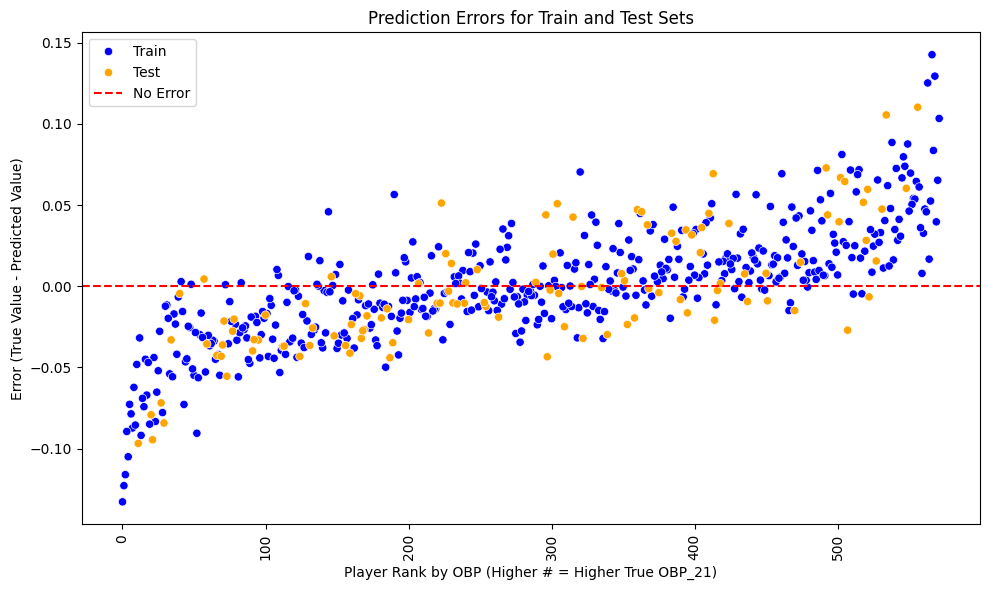

In [ ]:
# scatter plot of the prediction errors for both train and test sets
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_gb.index, y='Difference', data=df_combined_gb, hue='Set', palette={'Train': 'blue', 'Test': 'orange'})

# add a reference line at 0 (indicating no error)
plt.axhline(0, color='red', linestyle='--', label='No Error')

# labeling
plt.title('Prediction Errors for Train and Test Sets')
plt.xlabel('Player Rank by OBP (Higher # = Higher True OBP_21)')
plt.ylabel('Error (True Value - Predicted Value)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# The scatter plot reveals that the overwhelming majority of prediction errors are very close to zero, indicating that the model generally performs well for most players.
# The scatter plot illustrates the prediction errors for players ranked by their OBP_21, where players with the highest OBPs are located on the right side.
# Notably, the plot shows that the model tends to underestimate the performance of these top players, while it overestimates the OBPs for those ranked lower.
# This indicates that the model performs inconsistently at both extremes, suggesting it may struggle to accurately predict outcomes for the best and worst performers in this category.